# SciPy

SOMMAIRE :
- Définition<br>
- Statistiques à 1 échantillon<br>
-- Statistiques descriptives <br>
–- Calcul des seuils et des probabilités critiques<br>
–- Test d’adéquation à la loi normale (ou autre)<br>
–- Génération de nombres aléatoires - Echantillonnage (loi normale, loi exponentielle)<br>
–- Test de conformité à un standard – Test de Student<br>
- Statistiques à 2 vecteurs<br>
–- Comparaison de populations<br>
–- Mesures d’association<br>
- Statistiques à k vecteurs (k>2)<br>
–- Classification automatique<br>

## Définition
SciPy est un projet visant à unifier et fédérer un ensemble de bibliothèques Python à usage scientifique. Il est construit sur la base de numpy et utilise des tableaux comme structure de données de base.<br>
Il contient par notamment des modules pour l'optimisation, l'algèbre linéaire, les statistiques, le traitement du signal ou encore le traitement d'images. 

## Statistiques à un échantillon

### Statistiques descriptives
Le module 'stats' de la bibliothèque SciPy est utilisé pour les fonctions statistiques.

la fonction 'describe' sert à appliquer les méthodes de statistiques descriptives à un échantillon donné. Elle renvoie les statistiques suivantes :
- nobs : nombre d'observations dans l'échantillon
- min : minimum
- max : maximum
- mean : moyenne
- variance : mesure de la dispersion de des valeurs de l'échantillon (distribution de probabilité)
- skewness : mesure de l'asymétrie de la distribution d'une variable aléatoire réelle
- kurtosis : coefficient d'apatissement

In [2]:
# on importe le module stats de la bibliothèque scipy
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# prennons un échantillon de valeurs e, correspondant aux notes d'une classe de 20 étudiants
e = [19, 2, 10.5, 10, 8.5, 12.5, 7, 4, 8.5, 8, 14, 19, 7, 7, 9, 5.5, 12.5, 16, 5, 6]

In [4]:
description = stat.describe(e)
print(description)

DescribeResult(nobs=20, minmax=(2.0, 19.0), mean=9.55, variance=22.128947368421052, skewness=0.640079599669288, kurtosis=-0.3509423906490974)


In [5]:
#on peut obtenir l'un des éléments par indice
print("moyenne =", description[2])
#par nom
print("moyenne =", description.mean) 

# ce qui équivaut à np.mean(x)
print("moyenne =", np.mean(e))

moyenne = 9.55
moyenne = 9.55
moyenne = 9.55


In [6]:
#possiblité d'éclater les résultats avec une affectation multiple
n,mm,m,v,sk,kt= stat.describe(e)
print("nombre d'observations :", n, "- moyenne :", m)

nombre d'observations : 20 - moyenne : 9.55


### Calcul des seuils et des probabilités critiques
Ces calculs servent à obtenir les valeurs des quantiles et des fonctions de répartition pour différentes lois statistiques utilisées pour l’inférence.
Ils permettent notamment la construction d'intervalles de confiance.

Les principales méthodes de calculs de seuils pour les variables aléatoires continues sont :
- pdf : (Probability Density Function) : fonction de densité de probabilité
- cdf : (Cumulative Distribution Function) : fonction de distribution cumulative
- ppf : (Percent Point Function, = 1 / CDF) : fonction quantile

Voici quelques exemples avec les lois de probabilité les plus utilisées :

In [7]:
#loi normale centrée réduite
print(stat.norm.ppf(0.95,loc=0,scale=1)) # quantile d’ordre 0.95 de la loi normale d'espérance 0 et de variance 1 
print(stat.norm.cdf(1.96,loc=0,scale=1)) 

1.6448536269514722
0.9750021048517795


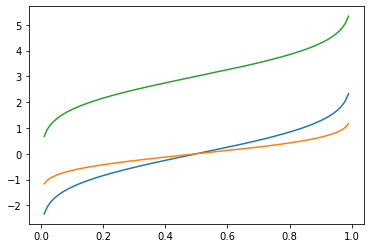

In [8]:
x = np.arange(0, 2, 0.01);
y1 = stat.norm.ppf(x,loc=0,scale=1)
y2 = stat.norm.ppf(x,loc=0,scale=0.5)
y3 = stat.norm.ppf(x,loc=3,scale=1)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

In [9]:
#loi de Student-ddl= 30
print(stat.t.ppf(0.95,df=30)) 
print(stat.t.cdf(1.96,df=30))


1.6972608943617378
0.9703288435519748


In [11]:
#loi du khi-2 -ddl= 10
print(stat.chi.ppf(0.95,df=10))
print(stat.chi.cdf(4.84,df=10))

4.278672463892877
0.9907199233490717


In [12]:
#loi de Fisher, ddl numérateur = 1, ddl dénominateur = 30
print(stat.f.ppf(0.95,dfn=1,dfd=30))
print(stat.f.cdf(3.48,dfn=1,dfd=30))

4.170876785766691
0.9280786614651921


### Test d’adéquation à la loi normale
Les tests de normalité permettent de vérifier que la distribution des données est compatible avec la loi Normale (Gauss). On cherche ici simplement à vérifer l'adéquation à la loi normale, non à déterminer une loi de distribution. 

Le test de D'Agostino ou test du K² de D'Agostino est basé sur les coefficients d'asymétrie et d'aplatissement. Lorsque ces deux indicateurs diffèrent simultanément de la valeur de référence 0, on conclut que la distribution empirique n'est pas compatible avec la loi normale. L'enjeu est de construire une combinaison efficace de ces indicateurs. <br>
La fonction 'normaltest' de SciPy retourne une statistique de test et un seuil critique (p-value). Si p-value < α, on rejette de l’hypothèse de normalité.

Le test d'Anderson-Darling est un test de normalité de l'échantillon statistique. Permet de détecter l'écart par rapport à la normalité des valeurs maximales et minimales d'une distribution. Il est le plus indiqué dans la phase d'évaluation des données précédant la mise en oeuvre d'un test paramétrique(comparaison de moyenne, de variances, etc.) <br>
La fonction "anderson" renvoie une statistique de test, et des seuils critiques pour chaque niveau de risque. 

Le test de Shapiro est plus fiable que les deux précédents sur des échantillons réduits. 



In [13]:
#prennons un nouvel échantillon d, plus pertinent pour les tests d'adéquation
d=[0.553,0.57,0.576,0.601,0.606,0.606,0.609,0.611,0.615,0.628,0.654,0.662,0.668,0.67,0.672,0.69,0.693,0.749]

In [14]:
#test de normalité d'Agostino
ag = stat.normaltest(d) # message d’avertissement, le nombre de valeurs est trop faible pour un test fiable
print(ag)

NormaltestResult(statistic=0.7143907939185827, pvalue=0.699635777674135)


C:\Users\utilisateur\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
# test de Normalité d'Anderson
ad = stat.anderson(d,dist="norm") # nb : le test possible pour autre loi que «norm»
print(ad)

AndersonResult(statistic=0.34029632368620355, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [16]:
#test de Normalité Shapiro-Wilks
sp= stat.shapiro(d)
print(sp)

ShapiroResult(statistic=0.9613385200500488, pvalue=0.627672016620636)


### Génération de nombres aléatoires - Echantillonnage (loi normale, loi exponentielle)
L'objectif est de disposer d’un générateur de nombres aléatoires permet de réaliser des simulations ou d’accéder à des techniques basées sur le ré-échantillonnage (bootstrap, etc.)

In [17]:
#génération de valeurs aléatoires -loi normale (0, 1)
alea1 = stat.norm.rvs(loc=0,scale=1,size=30)
print(alea1)

[-1.33376811 -1.34093431  0.31231603  2.16457424 -0.95760129 -0.65598172
 -1.41807412  0.04427963 -0.8929473   0.53330146  0.18709978  1.18064015
  0.07540029  0.33413872  0.80379568 -0.84961489  0.29623148  0.25729479
  2.1482005   0.93389402  0.16287464  1.10313223  2.29174704  1.08585309
  0.67053595 -1.24972546  1.12966359 -0.21766619 -1.14910938 -0.66744534]


In [18]:
print(stat.normaltest(alea1))

NormaltestResult(statistic=1.0708910539134857, pvalue=0.5854084168056652)


In [19]:
#génération -loi exponentielle
alea2 = stat.expon.rvs(size=30)
print(stat.normaltest(alea2)) 

NormaltestResult(statistic=8.119934857640967, pvalue=0.017249580945394038)


### Test de conformité à un standard – Test de Student
Le test de Student est un test standard pour comparer les valeurs de 2 échantillons a et b. Il renvoie une paire : statistique t, p-value.

Le test change selon que les échantillons ont le même nombre de valeurs ou un nombre différent. 
Pour des échantillons égaux on prendra scipy.stats.ttest_rel, pour des différents scipy.stats.ttest_ind.

In [20]:
a = [3, 5, 7]
b = [6, 9, 10]
c = [6, 9, 10, 11]

In [21]:
stat.ttest_rel(a,b)

Ttest_relResult(statistic=-10.0, pvalue=0.009852457023325692)

In [22]:
stat.ttest_ind(a,c)

Ttest_indResult(statistic=-2.496751135729437, pvalue=0.054707113913075575)

## Statistiques à 2 vecteurs

### Comparaison de population

In [23]:
import numpy as np
import scipy.stats as stat


dt = np.array([24,43,58,71,43,49,61,44,67,49,53,56,59,52,62,54,57,33,46,43,57])
dc = np.array([42,43,55,26,62,37,33,41,19,54,20,85,46,10,17,60,53,42,37,42,55,28,48])


d1968 = np.array([0.42,0.5,0.52,0.45,0.43,0.55,0.45,0.34,0.45,0.54,0.42,0.51,0.49,0.54,0.5,0.58,0.49,0.56,0.63])
d1972 = np.array([0.45,0.5,0.52,0.45,0.46,0.55,0.60,0.49,0.35,0.55,0.52,0.53,0.57,0.53,0.59,0.64,0.5,0.57,0.64])

<b>1. Test de Welch – comparaison de moyennes</b><br>

Tester statistiquement l’hypothèse d’égalité de deux moyennes avec deux échantillons de variances inégales

In [24]:
print(stat.ttest_ind(dt,dc,equal_var=False)) 

Ttest_indResult(statistic=2.310889197854228, pvalue=0.02638241282442478)


<b>2. Test de Bartlett – comparaison de paramètres d’échelle (variance)</b><br>
Evaluer si k échantillons indépendants sont issus de populations de même variance

In [25]:
print(stat.bartlett(dt,dc))

BartlettResult(statistic=3.8455356421051388, pvalue=0.04987858739511786)


<b>3. test de Ansari Bradley

In [26]:
print(stat.ansari(dt,dc))

AnsariResult(statistic=266.0, pvalue=0.24768048701691592)


C:\Users\utilisateur\anaconda3\lib\site-packages\scipy\stats\morestats.py:2136: UserWarning: Ties preclude use of exact statistic.
  warnings.warn("Ties preclude use of exact statistic.")


<b> 4. Test de Levene

In [27]:
print(stat.levene(dt,dc))

LeveneResult(statistic=2.3418185975754007, pvalue=0.133440294168933)


<b> 5. Test de Kolomogorov-Smirnov – écart entre les fonctions de répartition empiriques</b> <br>
Test d'hypothèse utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue, ou bien si deux échantillons suivent la même loi. 

In [28]:
print(stat.ks_2samp(dt,dc))

KstestResult(statistic=0.4699792960662526, pvalue=0.008988594868491018)


<b> 6. Test des rangs signés – non paramétrique</b><br>
 Alternative non-paramétrique au test de Student pour des échantillons appariés.


In [29]:
print(stat.wilcoxon(d1968,d1972))

WilcoxonResult(statistic=16.0, pvalue=0.0122241123197889)


C:\Users\utilisateur\anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


<b> 7. T-test related samples - paramétrique

In [30]:
print(stat.ttest_rel(d1968,d1972))


Ttest_relResult(statistic=-2.457703815601802, pvalue=0.024352597586836344)


# Association de population

In [31]:
dalc = np.array([6.47,6.13,6.19,4.89,5.63,4.52,5.89,4.79,5.27,6.08])
dtob = np.array([4.03,3.76,3.77,3.34,3.47,2.92,3.2,2.71,3.53,4.51])

<b> 1. Régression linéaire simple

In [32]:
print(stat.linregress(dalc,dtob))

LinregressResult(slope=0.6115012914647241, intercept=0.10815378587805125, rvalue=0.7842873201538676, pvalue=0.007234358351729509, stderr=0.17102020517368527)


<b>2. Corrélation de Pearson</b> <br>
Statistique qui mesure la corrélation linéaire entre deux variables X et Y.

In [33]:
print(stat.pearsonr(dalc,dtob))

(0.7842873201538678, 0.007234358351729485)


<b> 3. Corrélation de Spearman - basé sur les rangs</b><br>
Mesure de dépendance statistique non paramétrique entre deux variables.

In [34]:
print(stat.pearsonr(dalc,dtob)) # (r = 0.7843, p-value pour test t = 0.0072)

(0.7842873201538678, 0.007234358351729485)


<b> 4. Tau de Kendall - concordance et discordance</b><br>
Mesure la corrélation de rang entre deux variables.

In [35]:
print(stat.kendalltau(dalc,dtob))

KendalltauResult(correlation=0.6444444444444444, pvalue=0.009148478835978836)
